# QuTiP Example: Birth and Death of Photons in a Cavity

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *

## Overview

Here we aim to reproduce the experimental results from:

<blockquote>
  Gleyzes et al., "Quantum jumps of light recording the birth and death of a photon in a cavity", [Nature **446**, 297 (2007)](http://dx.doi.org/10.1038/nature05589).
</blockquote>

In particular, we will simulate the creation and annihilation of photons inside the optical cavity due to the thermal environment when the initial cavity is a single-photon Fock state $ |1\rangle$, as presented in Fig. 3 from the article.

## System Setup

In [5]:
N=5
a=destroy(N) 
H=a.dag()*a     # Simple oscillator Hamiltonian
psi0=basis(N,1) # Initial Fock state with one photon
kappa=1.0/0.129 # Coupling rate to heat bath
nth= 0.063      # Temperature with <n>=0.063

# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())

## Run Simulation

In [6]:
ntraj = [1,5,15,904] # number of MC trajectories
tlist = np.linspace(0,0.8,100)
mc = mcsolve(H,psi0,tlist,c_ops,[a.dag()*a],ntraj)
me = mesolve(H,psi0,tlist,c_ops, [a.dag()*a])

10.1%. Run time:   0.71s. Est. time left: 00:00:00:06
20.0%. Run time:   1.59s. Est. time left: 00:00:00:06
30.1%. Run time:   2.41s. Est. time left: 00:00:00:05
40.0%. Run time:   3.04s. Est. time left: 00:00:00:04
50.0%. Run time:   3.70s. Est. time left: 00:00:00:03
60.1%. Run time:   4.32s. Est. time left: 00:00:00:02
70.0%. Run time:   4.98s. Est. time left: 00:00:00:02
80.1%. Run time:   5.66s. Est. time left: 00:00:00:01
90.0%. Run time:   6.29s. Est. time left: 00:00:00:00
100.0%. Run time:   6.94s. Est. time left: 00:00:00:00
Total run time:   6.99s


## Plot Results

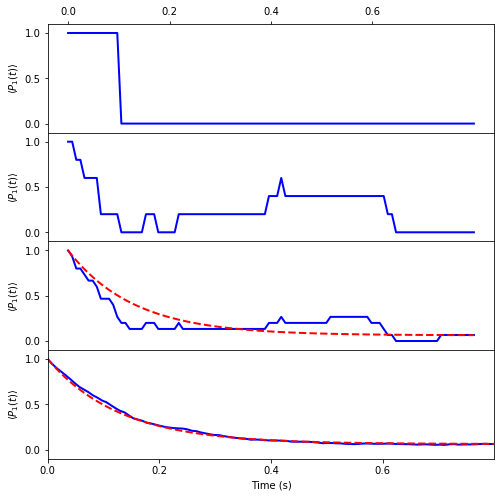

In [7]:
fig = plt.figure(figsize=(8, 8), frameon=False)
plt.subplots_adjust(hspace=0.0)

# Results for a single trajectory
ax1 = plt.subplot(4,1,1)
ax1.xaxis.tick_top()
ax1.plot(tlist,mc.expect[0][0],'b',lw=2)
ax1.set_xticks([0,0.2,0.4,0.6])
ax1.set_yticks([0,0.5,1])
ax1.set_ylim([-0.1,1.1])
ax1.set_ylabel(r'$\langle P_{1}(t)\rangle$')

# Results for five trajectories
ax2 = plt.subplot(4,1,2)
ax2.plot(tlist,mc.expect[1][0],'b',lw=2)
ax2.set_yticks([0,0.5,1])
ax2.set_ylim([-0.1,1.1])
ax2.set_ylabel(r'$\langle P_{1}(t)\rangle$')

# Results for fifteen trajectories
ax3 = plt.subplot(4,1,3)
ax3.plot(tlist,mc.expect[2][0],'b',lw=2)
ax3.plot(tlist,me.expect[0],'r--',lw=2)
ax3.set_yticks([0,0.5,1])
ax3.set_ylim([-0.1,1.1])
ax3.set_ylabel(r'$\langle P_{1}(t)\rangle$')

# Results for 904 trajectories
ax4 = plt.subplot(4,1,4)
ax4.plot(tlist,mc.expect[3][0],'b',lw=2)
ax4.plot(tlist,me.expect[0],'r--',lw=2)
plt.xticks([0,0.2,0.4,0.6])
plt.yticks([0,0.5,1])
ax4.set_xlim([0,0.8])
ax4.set_ylim([-0.1,1.1])
ax4.set_xlabel(r'Time (s)')
ax4.set_ylabel(r'$\langle P_{1}(t)\rangle$')

xticklabels = ax2.get_xticklabels()+ax3.get_xticklabels()
plt.setp(xticklabels, visible=False);

## Versions

In [8]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
